#Initialization

In [0]:
import sklearn.datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

#Import Data

In [280]:
brest_cancer = sklearn.datasets.load_breast_cancer()
print(brest_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [0]:
data = pd.DataFrame(data=brest_cancer.data,columns=brest_cancer.feature_names)
data['class'] = brest_cancer.target
 

In [282]:
print(data.shape)

(569, 31)


In [283]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [284]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [285]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


#Train Test Split



In [0]:
x = data.drop('class',axis=1)
y = data['class']

In [0]:
x_train, x_test , y_train,y_test  = train_test_split(x,y,test_size=.1,stratify=y,random_state=1)

In [288]:
print(x_train.shape,x_test.shape)

(512, 30) (57, 30)


In [289]:
print(x.mean(),x_train.mean(),x_test.mean())

mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst concav

#Binarization Input

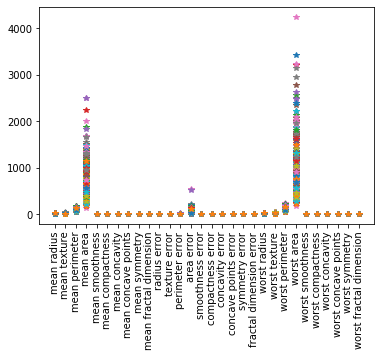

In [290]:
plt.plot(x_train.T,'*')
plt.xticks(rotation="vertical")
plt.show()

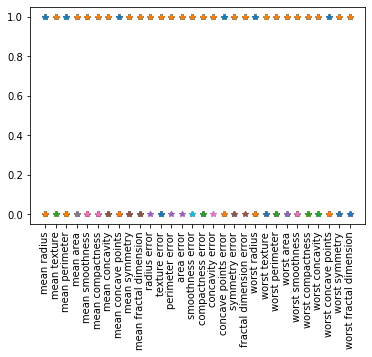

In [291]:
x_binarised_train = x_train.apply(pd.cut,bins=2,labels=[1,0])
plt.plot(x_binarised_train.T,'*')
plt.xticks(rotation="vertical")
plt.show()

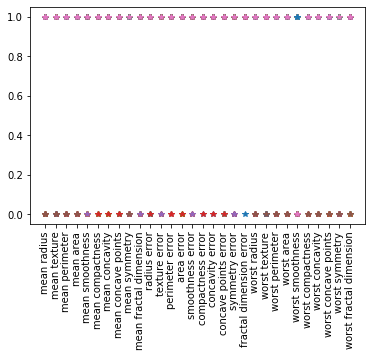

In [292]:
x_binarised_test = x_test.apply(pd.cut,bins=2,labels=[1,0])
plt.plot(x_binarised_test.T,'*')
plt.xticks(rotation="vertical")
plt.show()

In [0]:
x_binarised_train = x_binarised_train.values
x_binarised_test = x_binarised_test.values


In [294]:
print(x_binarised_train)

[[1 1 1 ... 0 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 1 0]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [0 1 0 ... 0 1 1]]


#MP Neuron model

In [295]:
for b in range(x_binarised_train.shape[1] +1):
  y_train_pred = []
  accurate_rows =0
  for x,y in zip(x_binarised_train,y_train): 
    y_prediction = (np.sum(x) >= b)
    y_train_pred.append(y_prediction)
    accurate_rows += (y==y_prediction)

  print(accurate_rows , accurate_rows/x_binarised_train.shape[0])

321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
321 0.626953125
323 0.630859375
324 0.6328125
329 0.642578125
332 0.6484375
336 0.65625
340 0.6640625
344 0.671875
352 0.6875
359 0.701171875
371 0.724609375
387 0.755859375
402 0.78515625
419 0.818359375
433 0.845703125
435 0.849609375
417 0.814453125
389 0.759765625


In [296]:
b =28
y_train_pred = []
accurate_rows =0
for x in x_binarised_test: 
  y_prediction = (np.sum(x) >= b)
  y_train_pred.append(y_prediction)


accuracy = accuracy_score(y_train_pred,y_test)

print(accuracy)

0.7894736842105263


#MP Neuron Class

In [0]:
class MPNeuron:
  def __init__(self):
    self.b = None
  
  def model(self,x):
    return (np.sum(x) >= self.b)

  def predict(self,x):
    y = [] 
    for i in x:
      result = self.model(i)
      y.append(result)
    return np.array(y)

  def fit(self,x,y):
    accuracy ={}

    for b in range(x.shape[1] + 1):
      self.b = b 
      y_pred = self.predict(x)
      accuracy[b]  = accuracy_score(y_pred,y_pred)
    
    best_b = max(accuracy,key=accuracy.get)
    self.b = best_b

    print("originam value of b is" , best_b)
    print("originam value of b is" , accuracy[best_b])


In [298]:
np_neuron = MPNeuron()
np_neuron.fit(x_binarised_train,y_train)

originam value of b is 0
originam value of b is 1.0


In [0]:
y_test_pred = np_neuron.predict(x_binarised_test)
accuracy_test = accuracy_score(y_test_pred ,y_test)

In [300]:
print(accuracy_test)

0.631578947368421


#Perceptron Class

In [0]:
X_train = x_train.values
X_test = x_test.values

In [0]:
class Perceptron:
  def __init__(self):
    self.b =None
    self.w = None

  def model(self,x):
    return (1 if (np.dot(self.w,x) >= self.b) else 0)

  def predict(self,X):
    y = [] 
    for x in X:
      result = self.model(x)
      y.append(result)
    return np.array(y)
  
  def fit(self,X,Y,epochs = 1,lr=1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    wt_matrix = []
    max_accuracy = 0;
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)
        if( y==1 and y_pred==0):
          self.w = self.w + lr * x
          self.b = self.b + lr * 1
        elif y==0 and y_pred==1:
          self.w = self.w - lr * x
          self.b = self.b - lr * 1
      wt_matrix.append(self.w)
      y_pred = self.predict(X)
      accuracy[i] = accuracy_score(y_pred,Y)
      if(accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        maxw  = self.w
        maxb  = self.b
    
    self.w = maxw
    self.b = maxb
    print(max_accuracy)
    plt.plot(np.array(list(accuracy.values())).astype(float))
    plt.show()

    return np.array(wt_matrix)

0.935546875


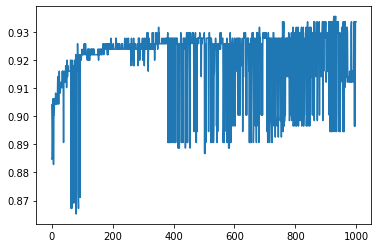

In [303]:
perceptron = Perceptron()
wt_matrix = perceptron.fit(X_train,y_train,1000,.0001)

In [304]:
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
print(accuracy)

0.9122807017543859


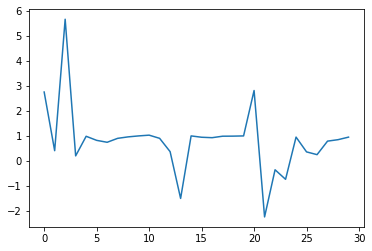

In [305]:
plt.plot(wt_matrix[-1,:])
plt.show()

#changing weights

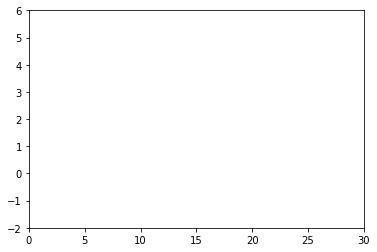

In [306]:
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-2, 6))

line, = ax.plot([], [], lw=2)

In [0]:
def init():
    line.set_data([], [])
    return (line,)

In [0]:
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i,:]
    line.set_data(x, y)
    return (line,)


In [0]:
anim = animation.FuncAnimation(fig, animate,frames=1000, interval=20, blit=True)

In [310]:
HTML(anim.to_html5_video())